In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('E:/داده کاوی گاز/output.Xlsx')
df.head(3)

,BN,TOF,AF,DS,feeder,RC,TOP,Relay,COB,PD,COP,DFB,CFB,DOFDB,PS,STOLP,EENS
0,88644,A,A,A,A,0.177419,A,A,A,NaN,NaN,1398/01/01 06:54,1398/01/01 06:59,5,NaN,NaN,0.010946
1,88645,A,B,B,B,0.145161,A,A,B,B,B,1398/01/01 07:15,1398/01/01 07:17,2,NaN,NaN,0.003127
2,88648,A,A,C,C,0.032258,A,A,C,NaN,NaN,1398/01/01 12:03,1398/01/01 12:45,42,NaN,NaN,0.016419


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BN      1649 non-null   int64  
 1   TOF     1649 non-null   object 
 2   AF      1649 non-null   object 
 3   DS      1649 non-null   object 
 4   feeder  1649 non-null   object 
 5   RC      1649 non-null   float64
 6   TOP     1649 non-null   object 
 7   Relay   1649 non-null   object 
 8   COB     1649 non-null   object 
 9   PD      858 non-null    object 
 10  COP     807 non-null    object 
 11  DFB     1649 non-null   object 
 12  CFB     1646 non-null   object 
 13  DOFDB   1649 non-null   int64  
 14  PS      812 non-null    object 
 15  STOLP   813 non-null    float64
 16  EENS    1649 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 219.1+ KB


In [6]:
df.columns

Index(['BN', 'TOF', 'AF', 'DS', 'feeder', 'RC', 'TOP', 'Relay', 'COB', 'PD',
       'COP', 'DFB', 'CFB', 'DOFDB', 'PS', 'STOLP', 'EENS'],
      dtype='object')

In [4]:
data=df.drop(['PD','COP','PS', 'STOLP'],axis=1)

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1648
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BN      1646 non-null   int64  
 1   TOF     1646 non-null   object 
 2   AF      1646 non-null   object 
 3   DS      1646 non-null   object 
 4   feeder  1646 non-null   object 
 5   RC      1646 non-null   float64
 6   TOP     1646 non-null   object 
 7   Relay   1646 non-null   object 
 8   COB     1646 non-null   object 
 9   DFB     1646 non-null   object 
 10  CFB     1646 non-null   object 
 11  DOFDB   1646 non-null   int64  
 12  EENS    1646 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 180.0+ KB


In [7]:
x=data.drop('EENS',axis=1)
y=data['EENS']

In [8]:
from category_encoders import TargetEncoder

In [9]:
encoder=TargetEncoder()
encoder.fit(x,y)
xclean=encoder.transform(x)

In [10]:
xclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1648
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BN      1646 non-null   int64  
 1   TOF     1646 non-null   float64
 2   AF      1646 non-null   float64
 3   DS      1646 non-null   float64
 4   feeder  1646 non-null   float64
 5   RC      1646 non-null   float64
 6   TOP     1646 non-null   float64
 7   Relay   1646 non-null   float64
 8   COB     1646 non-null   float64
 9   DFB     1646 non-null   float64
 10  CFB     1646 non-null   float64
 11  DOFDB   1646 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 167.2 KB


In [11]:
from sklearn.preprocessing import minmax_scale

In [12]:
X=pd.DataFrame(minmax_scale(xclean),columns=xclean.columns)


In [13]:
X.drop('BN',axis=1,inplace=True)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=9)

In [16]:
reg=DecisionTreeRegressor(max_depth=6,random_state=9)
reg.fit(xtrain,ytrain)
print('R2 train',reg.score(xtrain,ytrain))
print('R2 test',reg.score(xtest,ytest))

R2 train 0.847356091304627
R2 test 0.5051002360863435


In [17]:
y1=reg.predict(xtest)
print('MSE',mean_squared_error(ytest,y1))
print('MAE',mean_absolute_error(ytest,y1))

MSE 0.002007760863204178
MAE 0.025570393922324682


Text(0, 0.5, 'Predicted EENS')

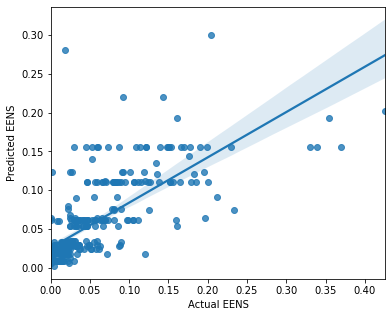

In [49]:
plt.figure(figsize=(6,5))
sns.regplot(x=ytest,y=y1)
plt.xlabel('Actual EENS')
plt.ylabel('Predicted EENS')

In [36]:
reg1=SVR(C=15,gamma=0.01)
reg1.fit(xtrain,ytrain)
print('R2 train',reg1.score(xtrain,ytrain))
print('R2 test',reg1.score(xtest,ytest))

R2 train 0.31985996460569865
R2 test 0.2305025027367279


In [37]:
y2=reg1.predict(xtest)
print('MSE',mean_squared_error(ytest,y2))
print('MAE',mean_absolute_error(ytest,y2))

MSE 0.003121777523434639
MAE 0.04283123381948897


Text(0, 0.5, 'Predicted EENS')

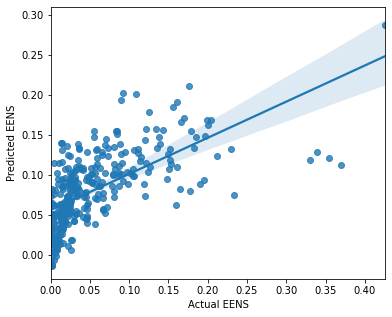

In [48]:
plt.figure(figsize=(6,5))
sns.regplot(x=ytest,y=y2)
plt.xlabel('Actual EENS')
plt.ylabel('Predicted EENS')

In [40]:
reg2=RandomForestRegressor(max_depth=6,random_state=9,oob_score=True)
reg2.fit(xtrain,ytrain)
print('R2 train',reg2.score(xtrain,ytrain))
print('R2 test',reg2.score(xtest,ytest))


R2 train 0.8264749819095002
R2 test 0.675951286005924


In [41]:
y3=reg2.predict(xtest)
print('MSE',mean_squared_error(ytest,y3))
print('MAE',mean_absolute_error(ytest,y3))

MSE 0.0013146345445468025
MAE 0.021064252745327243


Text(0, 0.5, 'Predicted EENS')

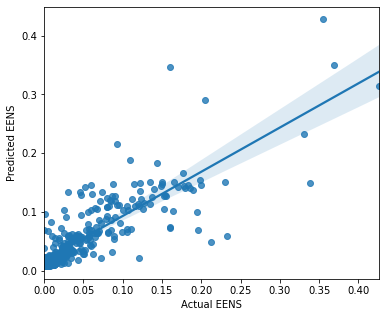

In [45]:
plt.figure(figsize=(6,5))
sns.regplot(x=ytest,y=y3)
plt.xlabel('Actual EENS')
plt.ylabel('Predicted EENS')

In [46]:
dfimportance =pd.DataFrame(reg2.feature_importances_, columns=['Feature_Importance'],
                              index=xtrain.columns)
dfimportance.sort_values(by='Feature_Importance',ascending=False,inplace=True)
dfimportance

,Feature_Importance
RC,0.397117
DOFDB,0.375873
COB,0.063162
AF,0.049603
feeder,0.049232
DS,0.031668
DFB,0.018314
Relay,0.014904
CFB,0.000128
TOF,0.000000


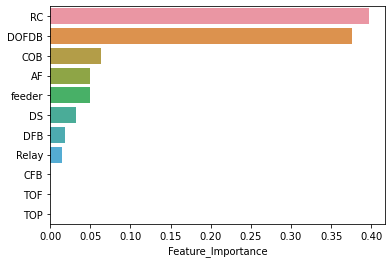

In [47]:
sns.barplot(y=dfimportance.index,x=dfimportance['Feature_Importance'])
plt.show()